In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

print("Setup Complete")

Setup Complete


In [6]:
#Explore Data
player_file_path='../_csv_files/nba_2014_2018_game_stats.csv'
team_data=pd.read_csv(player_file_path)
team_data.describe()

,TeamId,Game,GameLocationTypeId,OpponentId,Win,PTS,FGM,FGA,TPM,TPA,FTM,FTA,OREB,TREB,AST,STL,BLK,TOV,TF
count,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.00000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000
mean,15.500000,41.500000,1.500000,15.500000,0.500000,103.652337,38.602439,84.902439,9.126829,25.623679,17.32063,22.749390,10.287602,43.520630,22.546545,7.750508,4.827642,13.638618,20.058537
std,8.655881,23.670804,0.500025,8.655881,0.500025,12.188043,5.029992,7.130043,3.598084,7.102501,6.00262,7.390451,3.807120,6.410428,5.122989,2.958886,2.536845,3.869543,4.317611
min,1.000000,1.000000,1.000000,1.000000,0.000000,64.000000,19.000000,60.000000,0.000000,4.000000,1.00000,1.000000,0.000000,20.000000,6.000000,0.000000,0.000000,2.000000,7.000000
25%,8.000000,21.000000,1.000000,8.000000,0.000000,95.000000,35.000000,80.000000,7.000000,21.000000,13.00000,18.000000,8.000000,39.000000,19.000000,6.000000,3.000000,11.000000,17.000000
50%,15.500000,41.500000,1.500000,15.500000,0.500000,103.000000,38.000000,85.000000,9.000000,25.000000,17.00000,22.000000,10.000000,43.000000,22.000000,8.000000,5.000000,13.000000,20.000000
75%,23.000000,62.000000,2.000000,23.000000,1.000000,112.000000,42.000000,89.000000,11.000000,30.000000,21.00000,27.000000,13.000000,48.000000,26.000000,10.000000,6.000000,16.000000,23.000000
max,30.000000,82.000000,2.000000,30.000000,1.000000,149.000000,58.000000,129.000000,25.000000,61.000000,44.00000,64.000000,38.000000,81.000000,47.000000,21.000000,18.000000,29.000000,42.000000


In [7]:
team_data.head()

,TeamId,Game,Date,GameLocationTypeId,OpponentId,Win,PTS,FGM,FGA,TPM,TPA,FTM,FTA,OREB,TREB,AST,STL,BLK,TOV,TF
0,1,1,2014-10-29,2,14,0,102,40,80,13,22,9,17,10,42,26,6,8,17,24
1,1,2,2014-11-01,1,8,1,102,35,69,7,20,25,33,3,37,26,10,6,12,20
2,1,3,2014-11-05,2,29,0,92,38,92,8,25,8,11,10,37,26,14,5,13,25
3,1,4,2014-11-07,2,4,0,119,43,93,13,33,20,26,7,38,28,8,3,19,33
4,1,5,2014-11-08,1,11,1,103,33,81,9,22,28,36,12,41,18,10,5,8,17


In [8]:
# Choose target and features
y = team_data.Win
player_features = ['AST', 'STL', 'TF', 'BLK', 'TOV', 'OREB', 'TREB', 'FGM', 'FGA', 'FTM', 'FTA', 'PTS']
#player_features = ['TeamId','Game','GameLocationTypeId', 'OpponentId','PTS','FGM','FGA','TPM','TPA','FTM','FTA','OREB','TREB','AST','STL','BLK','TOV','TF']
X = team_data[player_features]

In [9]:
#Cross validation
my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor(n_estimators=75,
                                                              random_state=0))
                             ])

In [10]:
#fit estimator
my_pipeline.fit(X,y)

#Serialize estimator
with open('/home/tolotra/Desktop/my_pipeline.pkl','wb') as fid:
    pickle.dump(my_pipeline,fid)

In [11]:
# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=10,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)
print("Average MAE score (across experiments):")
print(scores.mean())

MAE scores:
 [0.28269648 0.28627371 0.29742547 0.29512195 0.2748374  0.27365854
 0.29670732 0.30509485 0.27853659 0.2901897 ]
Average MAE score (across experiments):
0.28805420054200537


In [12]:
val_predict =cross_val_predict(my_pipeline, X, y,cv=5)
print("Values predicted:\n",val_predict)

Values predicted:
 [0.61333333 0.72       0.28       ... 0.38666667 0.98666667 0.06666667]


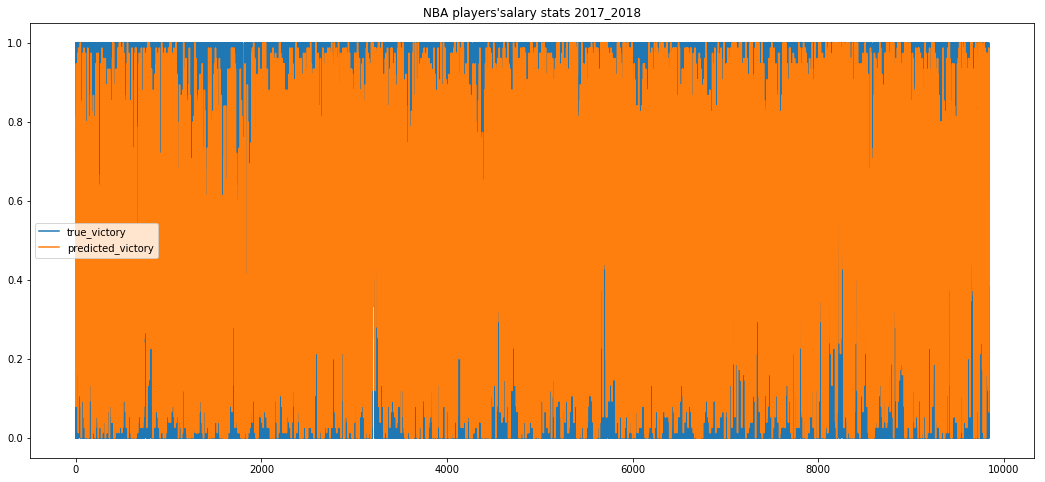

In [13]:
#data frame 
true_salary=team_data.Win
plot_data2=pd.DataFrame(data = {'true_victory':true_salary,'predicted_victory':val_predict})

# Set the width and height of the figure
plt.figure(figsize=(18,8))

# Add title
plt.title("NBA players'salary stats 2017_2018")

# Line chart showing true salary'
sns.lineplot(data=plot_data2['true_victory'], label="true_victory")

# Line chart showing predicted salary'
sns.lineplot(data=plot_data2['predicted_victory'], label="predicted_victory")

In [14]:
#Cross validation one row to predict
num=5000
Xnew=[X.iloc[num]]
ynew=my_pipeline.predict(Xnew)

def victory(y):
    if(y>0.5):
        return 1
    else:
        return 0
    
print("True victory: ",true_salary.iloc[num],"\nPredicted victory : ",victory(ynew))


True victory:  1 
Predicted victory :  1
